In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [6]:
""" Your code here: 讀取 train.csv, test.csv 並合併 """
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
total = pd.concat([train,test],axis = 0 )
print(test.shape,train.shape,total.shape)
total

(365, 81) (1095, 81) (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


## 分離目標

In [23]:
# 將目標分析欄位取出來 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
""" Your code here: """
#把它放到一個list裡面，每一個list裡面的第零個元素就是我們從total裡面取出來的資料
LotFrontage = [total.LotFrontage]
GarageYrBlt = [total.GarageYrBlt]
MasVnrArea = [total.MasVnrArea]

print(LotFrontage[0])

# filled with mean 再將原本的list再append 第一個元素為已經用平均值填補過的資料
LotFrontage.append(LotFrontage[0].fillna(LotFrontage[0].mean()))
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].mean()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].mean()))
print(LotFrontage[1])
# filled with median 再將原本的list再append 第二個元素為已經用中位數填補過的資料
LotFrontage.append(LotFrontage[0].fillna(LotFrontage[0].median()))
print(LotFrontage[2])
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].median()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].median()))



0      60.0
1      68.0
2      34.0
3      60.0
4      94.0
       ... 
360    70.0
361     NaN
362    49.0
363    59.0
364    84.0
Name: LotFrontage, Length: 1460, dtype: float64
0      60.000000
1      68.000000
2      34.000000
3      60.000000
4      94.000000
         ...    
360    70.000000
361    70.049958
362    49.000000
363    59.000000
364    84.000000
Name: LotFrontage, Length: 1460, dtype: float64
0      60.0
1      68.0
2      34.0
3      60.0
4      94.0
       ... 
360    70.0
361    69.0
362    49.0
363    59.0
364    84.0
Name: LotFrontage, Length: 1460, dtype: float64


## 繪圖

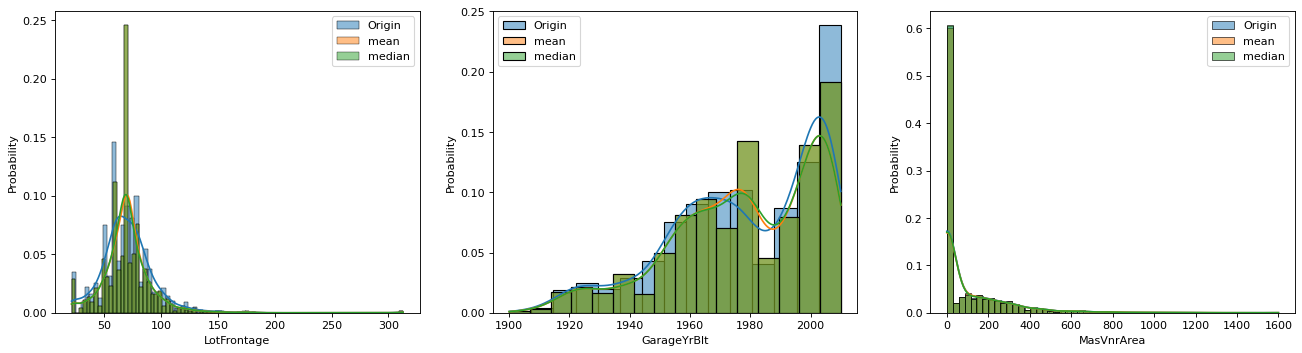

In [38]:
# 繪圖
""" Your code here: """
label = ['Origin' , 'mean' , 'median']
color = ['tab:blue','tab:orange','tab:green']

plt.figure(figsize = (20,5),dpi = 80)

plt.subplot(1,3,1)
for i in range(3):
    sns.histplot(LotFrontage[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()

plt.subplot(1,3,2)
for i in range(3):
    sns.histplot(GarageYrBlt[i], kde =True , stat = 'probability',element = 'bars' ,label = label[i],color = color[i])
plt.legend()

plt.subplot(1,3,3)
for i in range(3):
    sns.histplot(MasVnrArea[i],kde = True,stat = 'probability',element = 'bars',label = label[i],color = color[i])
plt.legend()

plt.show()

## 分析標準差

In [43]:
""" Your code here: """
for i in range(3):
    print(f'{label[i]}:')
    print(f'LotFrontage:{LotFrontage[i].std():.3f},GarageYrBlt:{GarageYrBlt[i].std():.3f},MasVnrArea:{MasVnrArea[i].std():.3f}')

Origin:
LotFrontage:24.285,GarageYrBlt:24.690,MasVnrArea:181.066
mean:
LotFrontage:22.024,GarageYrBlt:23.995,MasVnrArea:180.569
median:
LotFrontage:22.028,GarageYrBlt:23.997,MasVnrArea:180.731


## 透過分析標準差可以得到什麼結果？

In [44]:
#LotFrontage 有較多的缺失值(約缺失 17% 的資料)，故透過平均值及中位數填補具有較高的破壞性(標準差改變較多)